In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data

2023-12-06 04:38:33.242841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 04:38:33.242907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 04:38:33.243789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 04:38:33.249760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 04:38:33.947933: W tensorflow/compiler/tf2

In [2]:
dm = {
    "m1": "2023-12-06-03-21-11",
    "m2": "2023-12-06-03-23-06",
    "m4": "2023-12-06-03-24-02",
    "m8": "2023-12-06-03-24-12",
    "m16": "2023-12-06-03-26-10",
    "m32": "2023-12-06-03-26-20",
    "m64": "2023-12-06-03-26-29",
}
modelNames = ["m2", "m4", "m8", "m16", "m32", "m64"]

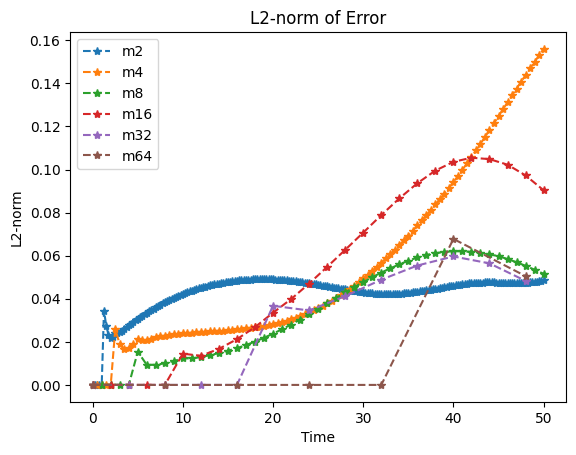

In [3]:
filename = "l2.png"


fig, ax = plt.subplots()
for modelName in modelNames:
    folderName = dm[modelName]
    cwd = sys.path[0]
    folderPath = os.path.join(cwd, "o4_analyze", folderName)
    data_pickle, data_json = read_data(folderPath)

    X_pred = data_pickle["X_pred"]
    X_true = data_pickle["X_true"]
    tArrayPred = data_pickle["tArrayPred"]
    L2Array = data_pickle["L2Array"]
    dx = data_json["s1"]["dx"]
    L = data_json["s1"]["L"]
    L2 = data_json["s4"]["L2"]

    ax.plot(tArrayPred, L2Array, "--*", label=modelName)
    ax.set_title(r"L2-norm of Error")
    ax.set_xlabel("Time")
    ax.set_ylabel("L2-norm")

plt.legend()

filepath = os.path.join(os.getcwd(), "o5_visualize", filename)
plt.savefig(filepath, dpi=300, bbox_inches="tight")